In [ ]:
file_path = '/content/textdata.txt'

In [ ]:
with open(file_path, 'r', encoding='utf-8') as file:
      text = file.read()

In [ ]:
!pip install nltk textblob pandas matplotlib vaderSentiment

In [ ]:
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import seaborn as sns
from nltk.corpus import opinion_lexicon
from collections import defaultdict, Counter
import networkx as nx

nltk.download('opinion_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# 소설의 전체적인 감정이 어떤지 분석

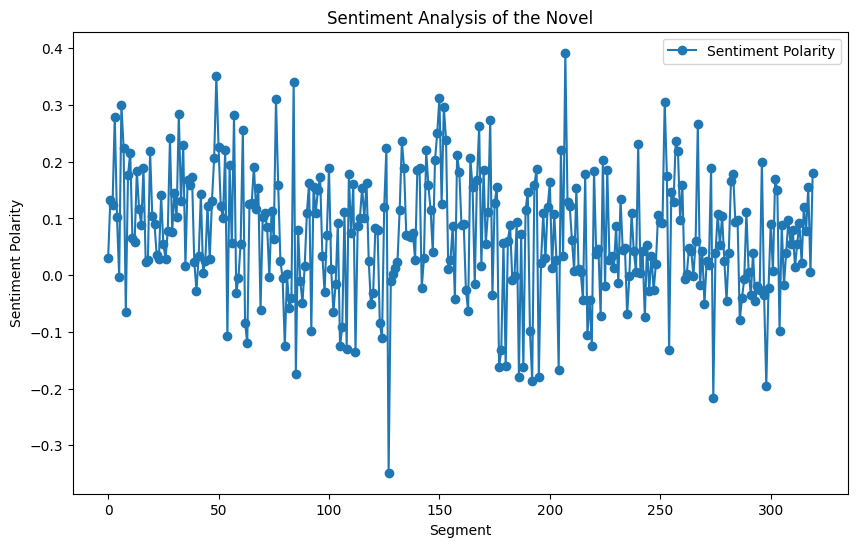

In [ ]:
#감정 분석
def analyze_sentiments(text, step=10):
    blob = TextBlob(text)
    sentiments = []

    #문장들을 일정한 그룹으로 나누기
    sentences = blob.sentences
    for i in range(0, len(sentences), step):

    #그래프를 용이하게 보기 위해 각 그룹의 문장들을 모아서 평균 극성을 계산
        group = sentences[i:i+step]
        group_polarity = sum(sentence.sentiment.polarity for sentence in group) / len(group)
        sentiments.append(group_polarity)

    return sentiments

def plot_sentiments(sentiments):
    plt.figure(figsize=(10, 6))
    plt.plot(sentiments, marker='o', linestyle='-', label='Sentiment Polarity')
    plt.xlabel('Segment')
    plt.ylabel('Sentiment Polarity')
    plt.title('Sentiment Analysis of the Novel')
    plt.legend()
    plt.show()

#감정 분석을 수행
sentiments = analyze_sentiments(text, step=10)

#감정 분석 결과를 시각화
plot_sentiments(sentiments)


In [ ]:
# 긍정적인 감정과 부정적인 감정을 나누어 분석

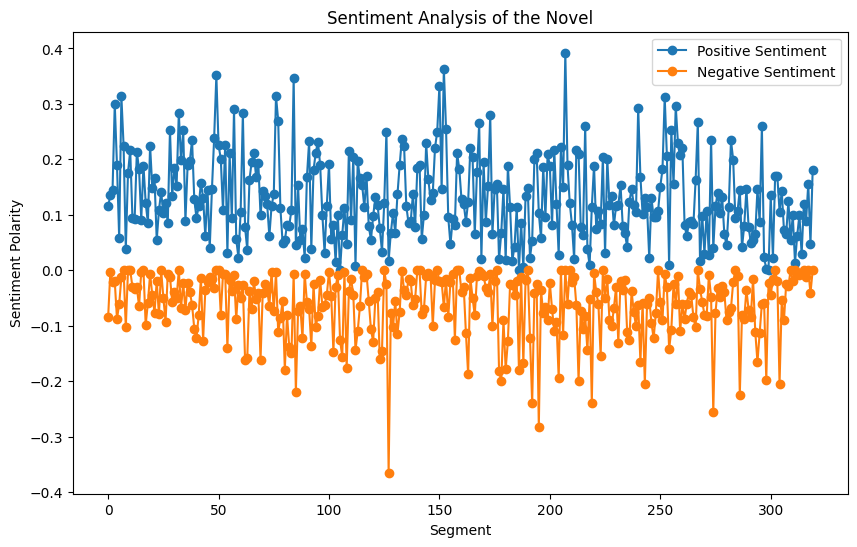

In [ ]:
def analyze_sentiments(text, step=10):
    blob = TextBlob(text)
    positive_sentiments = []
    negative_sentiments = []

    # 문장들을 일정한 그룹으로 나누기 # 10 groups
    sentences = blob.sentences
    for i in range(0, len(sentences), step):
        # 그래프를 용이하게 보기 위해 각 그룹의 문장들을 모아서 평균 극성을 계산
        group = sentences[i:i+step]
        positive_polarity = sum(sentence.sentiment.polarity for sentence in group if sentence.sentiment.polarity > 0) / len(group)
        negative_polarity = sum(sentence.sentiment.polarity for sentence in group if sentence.sentiment.polarity < 0) / len(group)
        positive_sentiments.append(positive_polarity)
        negative_sentiments.append(negative_polarity)

    return positive_sentiments, negative_sentiments

def plot_sentiments(positive_sentiments, negative_sentiments):
    plt.figure(figsize=(10, 6))
    plt.plot(positive_sentiments, marker='o', linestyle='-', label='Positive Sentiment')
    plt.plot(negative_sentiments, marker='o', linestyle='-', label='Negative Sentiment')
    plt.xlabel('Segment')
    plt.ylabel('Sentiment Polarity')
    plt.title('Sentiment Analysis of the Novel')
    plt.legend()
    plt.show()

# 감정 분석을 수행
positive_sentiments, negative_sentiments = analyze_sentiments(text, step=10)

# 감정 분석 결과를 시각화
plot_sentiments(positive_sentiments, negative_sentiments)


In [ ]:
# 최대/최소 감정 극성 값을 가진 세그먼트 찾기
def find_extreme_segments(positive_sentiments, negative_sentiments):
    max_positive_index = positive_sentiments.index(max(positive_sentiments))
    min_negative_index = negative_sentiments.index(min(negative_sentiments))
    return max_positive_index, min_negative_index

# 감정 분석을 수행
positive_sentiments, negative_sentiments = analyze_sentiments(text, step=10)

# 최대/최소 감정 극성 값을 가진 세그먼트 찾기
max_positive_segment, min_negative_segment = find_extreme_segments(positive_sentiments, negative_sentiments)

print(f"Max positive sentiment segment: {max_positive_segment}")
print(f"Min negative sentiment segment: {min_negative_segment}")


Max positive sentiment segment: 207
Min negative sentiment segment: 127


In [ ]:
# 감정 분석 함수
def analyze_sentiments(text):
    blob = TextBlob(text)
    sentiments = []
    for sentence in blob.sentences:
        polarity = sentence.sentiment.polarity
        sentiments.append((sentence, polarity))
    return sentiments

# 최댓값에 해당하는 문장과 최솟값에 해당하는 문장 출력
def print_extreme_sentences(sentiments):
    max_sentiment = max(sentiments, key=lambda x: x[1])
    min_sentiment = min(sentiments, key=lambda x: x[1])

    print(f"Max sentiment sentence: {max_sentiment[0]}")
    print(f"Min sentiment sentence: {min_sentiment[0]}")

# 감정 분석을 수행하여 각 문장의 감정을 분석
sentiments = analyze_sentiments(text)

# 최댓값에 해당하는 문장과 최솟값에 해당하는 문장 출력
print_extreme_sentences(sentiments)


Max sentiment sentence: Farewell, my dear, excellent Margaret.
Min sentiment sentence: But
that would be a cruel kindness, and I dare not do it.


In [ ]:
# 긍정적 감정과 부정적 감정을 합쳐 소설의 전체적인 분위기 분석

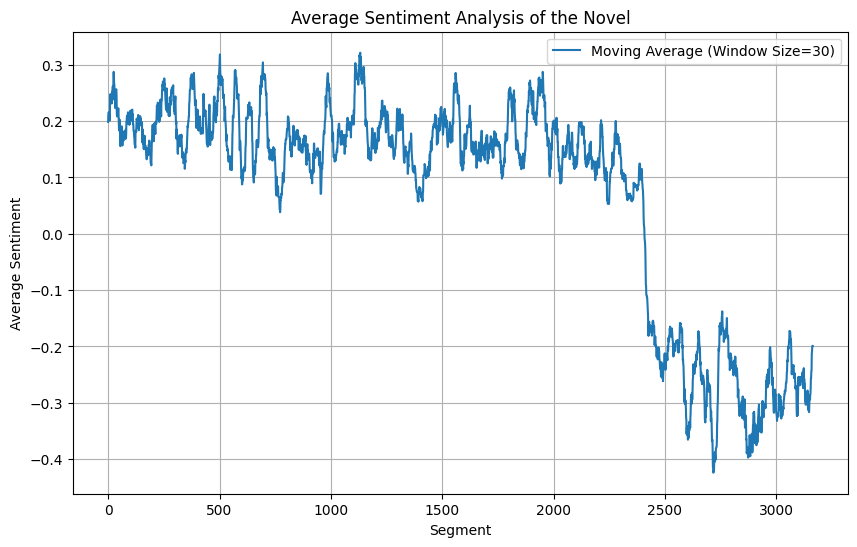

In [ ]:
# 감정 분석 수행: 긍정적 감정과 부정적 감정을 분리
def analyze_sentiments(text):
    blob = TextBlob(text)
    positive_sentiments = []
    negative_sentiments = []

    for sentence in blob.sentences:
        sentiment = sentence.sentiment.polarity
        if sentiment >= 0:
            positive_sentiments.append(sentiment)
        else:
            negative_sentiments.append(sentiment)

    return positive_sentiments, negative_sentiments

# 이동평균 계산: 데이터의 추세를 더 부드럽게 만들어줌
def moving_average(data, window_size):
    ma = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return ma

# 그래프로 시각화
def plot_average_sentiment(average_sentiments, window_size):
    ma_sentiments = moving_average(average_sentiments, window_size)

    plt.figure(figsize=(10, 6))
    plt.plot(ma_sentiments, linestyle='-', label=f'Moving Average (Window Size={window_size})')
    plt.xlabel('Segment')
    plt.ylabel('Average Sentiment')
    plt.title('Average Sentiment Analysis of the Novel')
    plt.legend()
    plt.grid(True)
    plt.show()

# 주요 함수 실행
def main(file_path):
    positive_sentiments, negative_sentiments = analyze_sentiments(text)

    # 긍정적 감정과 부정적 감정을 합산
    total_sentiments = positive_sentiments + negative_sentiments

    # 시각화
    window_size = 30  # 이동평균을 계산할 때 고려되는 데이터 포인트의 수를 결정
    plot_average_sentiment(total_sentiments, window_size)

main(file_path)


In [ ]:
# 결말에서 비교적 부정적인 감정을 나타냄
# 그러나 이 결과가 꼭 부정적인 결말을 뜻하지는 않음

In [ ]:
# 감정적 단어의 빈도수 분석

<ipython-input-22-3f744a62472b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="viridis")


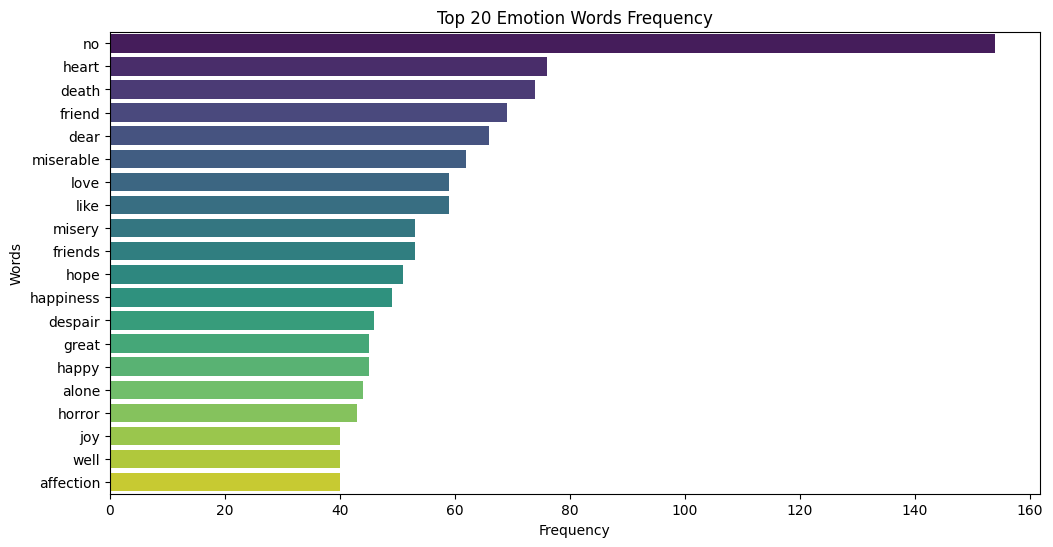

In [ ]:
# 감정 단어 추출
def extract_emotion_words(text):
    analyzer = SentimentIntensityAnalyzer()
    words = word_tokenize(text)
    emotion_words = []

    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] != 0:
            emotion_words.append(word)

    return emotion_words

# 감정 단어 빈도 계산
def calculate_frequency(emotion_words):
    frequency = Counter(emotion_words)
    return frequency

# 감정 단어 빈도 시각화
def plot_frequency(frequency):
    most_common = frequency.most_common(20)
    words = [item[0] for item in most_common]
    counts = [item[1] for item in most_common]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts, y=words, palette="viridis")
    plt.title("Top 20 Emotion Words Frequency")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# 실행 함수
def main(file_path):
    emotion_words = extract_emotion_words(text)
    frequency = calculate_frequency(emotion_words)
    plot_frequency(frequency)

# 분석 실행
main(file_path)


In [ ]:
# 감정적 단어들 간의 네트워크 분석

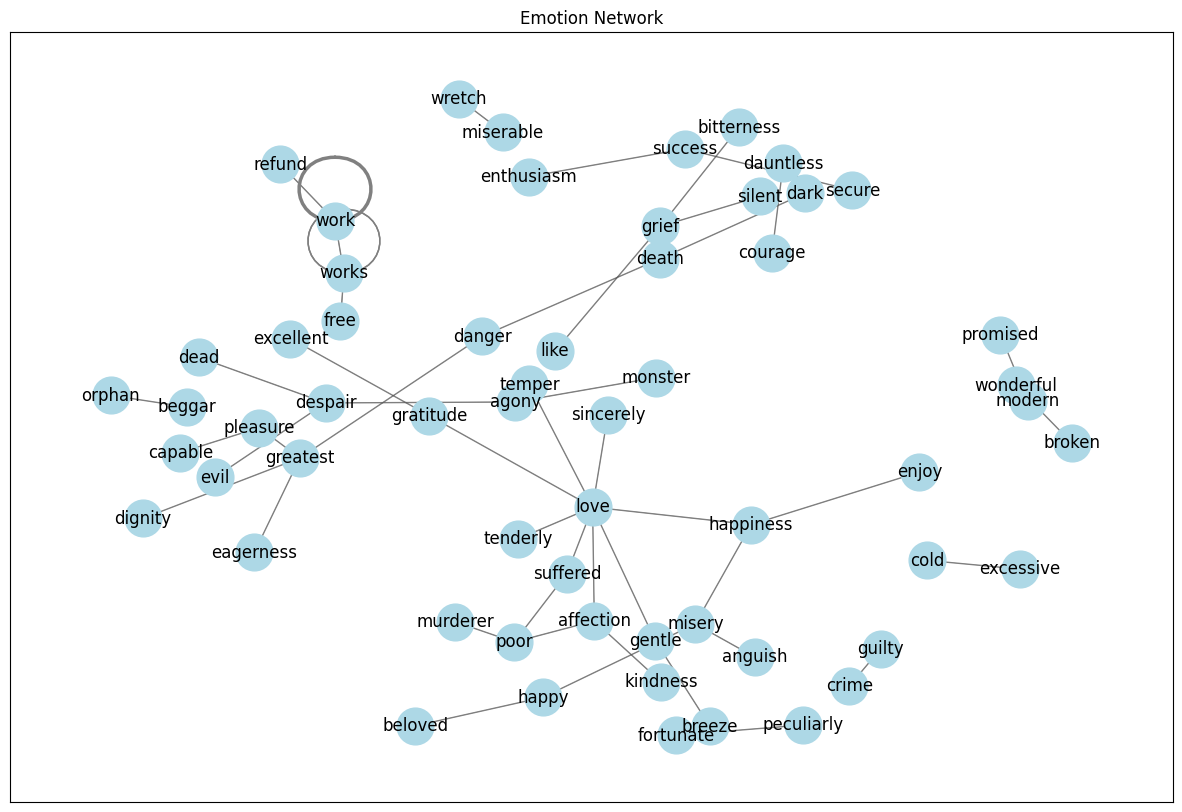

In [ ]:
# 감정 단어 리스트 불러오기
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# 텍스트 토큰화 및 감정 단어 추출
def extract_emotion_words(text):
    words = word_tokenize(text)
    emotion_words = [word for word in words if word in positive_words or word in negative_words]
    return emotion_words

# 감정 네트워크 구성
def build_emotion_network(emotion_words, top_n=50):
    G = nx.Graph()
    word_pairs = zip(emotion_words, emotion_words[1:])
    counter = Counter(word_pairs)

    most_common_pairs = counter.most_common(top_n)
    for (word1, word2), weight in most_common_pairs:
        G.add_edge(word1, word2, weight=weight)

    return G

# 감정 네트워크 시각화
def draw_emotion_network(G, seed=42):
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=seed)
    plt.figure(figsize=(15, 10))

    # 노드와 엣지 그리기
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # 엣지의 가중치에 비례한 굵기로 그리기
    edge_weights = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=[weight * 0.1 for weight in edge_weights.values()])

    # 노드 라벨 그리기
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.title('Emotion Network')
    plt.show()

# 실행 함수
def main(file_path, top_n=50):
    emotion_words = extract_emotion_words(text)
    G = build_emotion_network(emotion_words, top_n)
    draw_emotion_network(G)

# 분석 실행 (상위 50개의 빈도 높은 감정 단어 쌍만 포함)
main(file_path, top_n=50)


In [ ]:
# death는 danger나 dark와 연결되어 있고, happy는 beloved나 gentle과 연결되어 있음
# 비슷한 감정을 나타내는 단어들끼리 연결되어 있음
# 반대 감정을 나타내는 단어들끼리 연결되어 있는 경우도 있음
# 감정의 대조, 감정의 변화, 또는 모순된 감정을 가지고 있을 수도 있음